# Logistic regression:

Testuen sailkapena gaika:
* Gizartea --> 0
* Politika --> 1
* Kirola --> 2
* Zientzia eta teknologia --> 3
* Ekonomia --> 4
* Historia --> 5
* Geografia --> 6

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
with open('Data def/X_train.bin', 'rb') as f:
    X_train = np.load(f)
with open('Data def/X_test.bin', 'rb') as f:
    X_test = np.load(f)
with open('Data def/y_train.bin', 'rb') as f:
    y_train = np.load(f)
with open('Data def/y_test.bin', 'rb') as f:
    y_test = np.load(f)
class Dataset:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
data = Dataset(X_train, X_test, y_train, y_test)

In [13]:
print(len(X_test))
print(len(data.X_test))

1326
1326


In [3]:
def score(data, model):
    y_pred = model.predict(data.X_test)
    return accuracy_score(data.y_test, y_pred)
    
@ignore_warnings(category=ConvergenceWarning)
def fit_score(data, model):
    model.fit(data.X_train, data.y_train)
    return score(data, model)

In [19]:
#@ignore_warnings(category=ConvergenceWarning)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')

Accuracy: 90.5%


/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(data.X_train,data.y_train)
    return grid_search

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’

In [59]:
@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(data.X_train,data.y_train)
    return grid_search

params = {'C': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1], 'solver': ['lbfgs', 'newton-cg','liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  29.9s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  28.5s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  29.6s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  28.4s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  29.8s
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.1min
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.3min
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.0min
[CV] END ..........................C=1e-05, solver=newton-cg; total time=  58.7s
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.1min
[CV] END ..........................C=1e-05, solver=liblinear; total time= 1.4min
[CV] END ..........................C=1e-05, solv

In [60]:
print(grid_search.best_params_)

{'C': 1e-05, 'solver': 'liblinear'}


In [21]:
params = {'C': [1e-7, 1e-6, 1e-5], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................C=1e-07, solver=liblinear; total time=  29.8s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  34.3s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  28.0s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  28.6s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  31.1s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.6s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  50.3s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.0s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.2s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  46.2s
[CV] END ..........................C=1e-05, solver=liblinear; total time= 1.4min
[CV] END ..........................C=1e-05, solve

In [22]:
model = LogisticRegression(random_state=42, **grid_search.best_params_) # {'C': 0.01, 'solver': 'lbfgs'}
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 92.2%


In [62]:
model = LogisticRegression(random_state=42 ) # {'C': 1, 'solver': 'lbfgs'}
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 90.5%


Grid-aren bitartez %2 handitu da zehaztasuna.

### Ereduaren probak

In [5]:
def sailkapena(esaldi, model):
    pred = model.predict(esaldi)
    match pred[0]:
        case 0.0:
            return("Gizartea")
        case 1.0:
            return("Politika")
        case 2.0:
            return("Kirola")
        case 3.0:
            return("Zientzia eta teknologia")
        case 4.0:
            return("Ekonomia")
        case 5.0:
            return("Historia")
        case 6.0:
            return("Geografia")

In [6]:
with open('Data def/hegoafrika.bin', 'rb') as f:
    esaldia_g = np.load(f)
#"Hegoafrikan ardo ona egiten omen da Stellenbosch aldean. Lurmutur hiria, Pretoria, hiri handiak ere topa daitezke"
with open('Data def/altuna.bin', 'rb') as f:
    esaldia_k = np.load(f)
# "Pilotan Altuna III. atera da garaile, Iñaki Artola 22-19 garaitu ondoren. Bi gipuzkoarrek urte luzeetan ahaztuko ez dugun erakustaldia eman ziguten."

In [4]:
model = LogisticRegression(random_state=42, C = 1e-5, solver = 'liblinear') # {'C': 1e-5, 'solver': 'liblinear'}
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 92.2%


In [7]:
print(sailkapena(esaldia_g,model))
print(sailkapena(esaldia_k,model))

Geografia
Kirola


## Adierazpen grafikoa:

### solver : liblinear

In [23]:
params = {'C': [1e-7], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1e-07, solver=liblinear; total time=  29.8s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  28.3s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  28.0s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  28.5s
[CV] END ..........................C=1e-07, solver=liblinear; total time=  31.1s
grid_search.best_params_ = {'C': 1e-07, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.8793359770953)


In [5]:
params = {'C': [1e-6], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.6s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  50.3s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.0s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  54.2s
[CV] END ..........................C=1e-06, solver=liblinear; total time=  46.2s
grid_search.best_params_ = {'C': 1e-06, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9091218679423114)


In [6]:
params = {'C': [1e-4], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................C=0.0001, solver=liblinear; total time= 2.1min
[CV] END .........................C=0.0001, solver=liblinear; total time= 1.5min
[CV] END .........................C=0.0001, solver=liblinear; total time= 1.5min
[CV] END .........................C=0.0001, solver=liblinear; total time= 1.7min
[CV] END .........................C=0.0001, solver=liblinear; total time= 1.6min
grid_search.best_params_ = {'C': 0.0001, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9145901872565932)


In [7]:
params = {'C': [1e-3], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=0.001, solver=liblinear; total time= 2.3min
[CV] END ..........................C=0.001, solver=liblinear; total time= 1.8min
[CV] END ..........................C=0.001, solver=liblinear; total time= 2.2min
[CV] END ..........................C=0.001, solver=liblinear; total time= 1.8min
[CV] END ..........................C=0.001, solver=liblinear; total time= 1.8min
grid_search.best_params_ = {'C': 0.001, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9132697882026568)


In [8]:
params = {'C': [1e-2], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................C=0.01, solver=liblinear; total time= 2.3min
[CV] END ...........................C=0.01, solver=liblinear; total time= 1.7min
[CV] END ...........................C=0.01, solver=liblinear; total time= 2.0min
[CV] END ...........................C=0.01, solver=liblinear; total time= 1.9min
[CV] END ...........................C=0.01, solver=liblinear; total time= 1.8min
grid_search.best_params_ = {'C': 0.01, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9130816424519409)


In [9]:
params = {'C': [1], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=1, solver=liblinear; total time= 2.2min
[CV] END ..............................C=1, solver=liblinear; total time= 2.0min
[CV] END ..............................C=1, solver=liblinear; total time= 1.7min
[CV] END ..............................C=1, solver=liblinear; total time= 1.9min
[CV] END ..............................C=1, solver=liblinear; total time= 2.0min
grid_search.best_params_ = {'C': 1, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9121389575516157)


In [10]:
params = {'C': [10], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=10, solver=liblinear; total time= 2.3min
[CV] END .............................C=10, solver=liblinear; total time= 1.8min
[CV] END .............................C=10, solver=liblinear; total time= 2.3min
[CV] END .............................C=10, solver=liblinear; total time= 2.3min
[CV] END .............................C=10, solver=liblinear; total time= 1.9min
grid_search.best_params_ = {'C': 10, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9117617768925721)


In [12]:
params = {'C': [0.1], 'solver': ['liblinear']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................C=0.1, solver=liblinear; total time= 2.3min
[CV] END ............................C=0.1, solver=liblinear; total time= 1.7min
[CV] END ............................C=0.1, solver=liblinear; total time= 2.1min
[CV] END ............................C=0.1, solver=liblinear; total time= 2.2min
[CV] END ............................C=0.1, solver=liblinear; total time= 1.8min
grid_search.best_params_ = {'C': 0.1, 'solver': 'liblinear'}
grid_search.best_score_ = np.float64(0.9130818202834634)


### solver : lbfgs

In [5]:
params = {'C': [1e-7], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=1e-07, solver=lbfgs; total time=  27.0s
[CV] END ..............................C=1e-07, solver=lbfgs; total time=  27.8s
[CV] END ..............................C=1e-07, solver=lbfgs; total time=  29.0s
[CV] END ..............................C=1e-07, solver=lbfgs; total time=  30.7s
[CV] END ..............................C=1e-07, solver=lbfgs; total time=  30.1s
grid_search.best_params_ = {'C': 1e-07, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.8861218501591592)


In [6]:
params = {'C': [1e-6], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=1e-06, solver=lbfgs; total time=  27.5s
[CV] END ..............................C=1e-06, solver=lbfgs; total time=  27.9s
[CV] END ..............................C=1e-06, solver=lbfgs; total time=  28.9s
[CV] END ..............................C=1e-06, solver=lbfgs; total time=  27.7s
[CV] END ..............................C=1e-06, solver=lbfgs; total time=  27.7s
grid_search.best_params_ = {'C': 1e-06, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.9034664698664485)


In [7]:
params = {'C': [1e-5], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  31.5s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  31.2s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  28.4s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  29.7s
[CV] END ..............................C=1e-05, solver=lbfgs; total time=  26.7s
grid_search.best_params_ = {'C': 1e-05, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.9015816335603649)


In [8]:
params = {'C': [1e-4], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=0.0001, solver=lbfgs; total time=  24.5s
[CV] END .............................C=0.0001, solver=lbfgs; total time=  27.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=  28.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=  29.5s
[CV] END .............................C=0.0001, solver=lbfgs; total time=  27.1s
grid_search.best_params_ = {'C': 0.0001, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.9002607010118613)


In [9]:
params = {'C': [1e-3], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=0.001, solver=lbfgs; total time=  29.6s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  30.4s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  34.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  31.4s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  29.7s
grid_search.best_params_ = {'C': 0.001, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.8951708071772801)


In [10]:
params = {'C': [1e-2], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=  27.6s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  28.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  31.9s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  27.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  28.0s
grid_search.best_params_ = {'C': 0.01, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.8974333576369748)


In [11]:
params = {'C': [0.1], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=0.1, solver=lbfgs; total time=  30.7s
[CV] END ................................C=0.1, solver=lbfgs; total time=  27.6s
[CV] END ................................C=0.1, solver=lbfgs; total time=  29.5s
[CV] END ................................C=0.1, solver=lbfgs; total time=  30.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=  32.1s
grid_search.best_params_ = {'C': 0.1, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.8963021713228887)


In [12]:
params = {'C': [1], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..................................C=1, solver=lbfgs; total time=  29.4s
[CV] END ..................................C=1, solver=lbfgs; total time=  24.8s
[CV] END ..................................C=1, solver=lbfgs; total time=  29.5s
[CV] END ..................................C=1, solver=lbfgs; total time=  27.8s
[CV] END ..................................C=1, solver=lbfgs; total time=  27.7s
grid_search.best_params_ = {'C': 1, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.8968662529119913)


In [13]:
params = {'C': [10], 'solver': ['lbfgs']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=10, solver=lbfgs; total time=  25.4s
[CV] END .................................C=10, solver=lbfgs; total time=  28.4s
[CV] END .................................C=10, solver=lbfgs; total time=  25.7s
[CV] END .................................C=10, solver=lbfgs; total time=  28.5s
[CV] END .................................C=10, solver=lbfgs; total time=  29.0s
grid_search.best_params_ = {'C': 10, 'solver': 'lbfgs'}
grid_search.best_score_ = np.float64(0.899507051019864)


### solver:newton-cg

In [22]:
params = {'C': [10], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=10, solver=newton-cg; total time=  28.4s
[CV] END .............................C=10, solver=newton-cg; total time=  23.0s
[CV] END .............................C=10, solver=newton-cg; total time=  26.1s
[CV] END .............................C=10, solver=newton-cg; total time=  19.9s
[CV] END .............................C=10, solver=newton-cg; total time=  24.6s
grid_search.best_params_ = {'C': 10, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9128922518805684)


In [23]:
params = {'C': [1], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=1, solver=newton-cg; total time=  28.4s
[CV] END ..............................C=1, solver=newton-cg; total time=  27.0s
[CV] END ..............................C=1, solver=newton-cg; total time=  28.8s
[CV] END ..............................C=1, solver=newton-cg; total time=  26.0s
[CV] END ..............................C=1, solver=newton-cg; total time=  28.2s
grid_search.best_params_ = {'C': 1, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9134586452794622)


In [24]:
params = {'C': [0.1], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=  26.5s
[CV] END ............................C=0.1, solver=newton-cg; total time=  28.4s
[CV] END ............................C=0.1, solver=newton-cg; total time=  28.4s
[CV] END ............................C=0.1, solver=newton-cg; total time=  33.8s
[CV] END ............................C=0.1, solver=newton-cg; total time=  26.1s
grid_search.best_params_ = {'C': 0.1, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9128922518805684)


In [25]:
params = {'C': [1e-2], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................C=0.01, solver=newton-cg; total time=  29.9s
[CV] END ...........................C=0.01, solver=newton-cg; total time=  29.5s
[CV] END ...........................C=0.01, solver=newton-cg; total time=  27.5s
[CV] END ...........................C=0.01, solver=newton-cg; total time=  27.1s
[CV] END ...........................C=0.01, solver=newton-cg; total time=  28.8s
grid_search.best_params_ = {'C': 0.01, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9140239716892216)


In [26]:
params = {'C': [1e-3], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=  29.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=  25.3s
[CV] END ..........................C=0.001, solver=newton-cg; total time=  26.4s
[CV] END ..........................C=0.001, solver=newton-cg; total time=  27.9s
[CV] END ..........................C=0.001, solver=newton-cg; total time=  26.8s
grid_search.best_params_ = {'C': 0.001, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9151553358348302)


In [27]:
params = {'C': [1e-4], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................C=0.0001, solver=newton-cg; total time=  22.9s
[CV] END .........................C=0.0001, solver=newton-cg; total time=  24.1s
[CV] END .........................C=0.0001, solver=newton-cg; total time=  23.7s
[CV] END .........................C=0.0001, solver=newton-cg; total time=  23.7s
[CV] END .........................C=0.0001, solver=newton-cg; total time=  25.0s
grid_search.best_params_ = {'C': 0.0001, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9149668344210694)


In [28]:
params = {'C': [1e-5], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.0min
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.2min
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.1min
[CV] END ..........................C=1e-05, solver=newton-cg; total time=  57.6s
[CV] END ..........................C=1e-05, solver=newton-cg; total time= 1.0min
grid_search.best_params_ = {'C': 1e-05, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9145898315935483)


In [29]:
params = {'C': [1e-6], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1e-06, solver=newton-cg; total time= 2.1min
[CV] END ..........................C=1e-06, solver=newton-cg; total time= 1.8min
[CV] END ..........................C=1e-06, solver=newton-cg; total time= 1.5min
[CV] END ..........................C=1e-06, solver=newton-cg; total time= 1.6min
[CV] END ..........................C=1e-06, solver=newton-cg; total time= 2.0min
grid_search.best_params_ = {'C': 1e-06, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.9111948499991108)


In [30]:
params = {'C': [1e-7], 'solver': ['newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1e-07, solver=newton-cg; total time= 2.0min
[CV] END ..........................C=1e-07, solver=newton-cg; total time= 1.6min
[CV] END ..........................C=1e-07, solver=newton-cg; total time= 1.6min
[CV] END ..........................C=1e-07, solver=newton-cg; total time= 1.6min
[CV] END ..........................C=1e-07, solver=newton-cg; total time= 1.8min
grid_search.best_params_ = {'C': 1e-07, 'solver': 'newton-cg'}
grid_search.best_score_ = np.float64(0.879334732274643)


In [39]:
C_graf = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]
acc_graf_liblinear = [0.8793359770953, 0.9091218679423114, 0.9183609268578948, 0.9145901872565932, 0.9132697882026568, 0.9130816424519409, 0.9130818202834634, 0.9121389575516157, 0.9117617768925721]
acc_graf_lbfgs = [0.8861218501591592, 0.9034664698664485, 0.9015816335603649, 0.9002607010118613, 0.8951708071772801, 0.8974333576369748, 0.8963021713228887, 0.8968662529119913, 0.899507051019864]
acc_graf_newton_cg = [0.879334732274643, 0.9111948499991108, 0.9145898315935483, 0.9149668344210694, 0.9151553358348302, 0.9140239716892216, 0.9128922518805684, 0.9134586452794622, 0.9128922518805684]





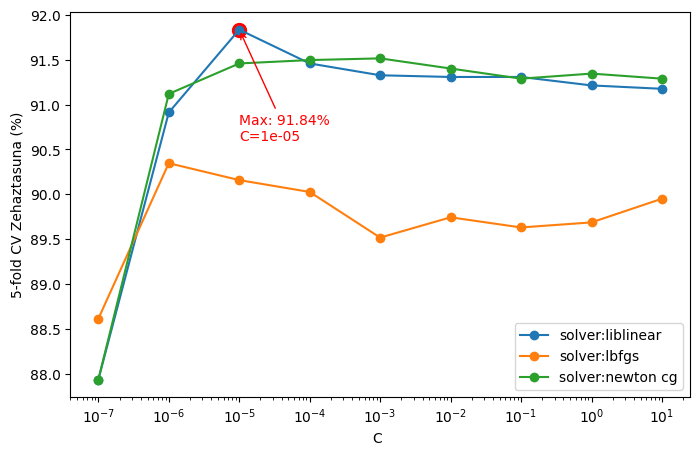

In [40]:
import matplotlib.pyplot as plt


C_graf = C_graf[:len(acc_graf_liblinear)]

acc_percent_liblinear = [a * 100 for a in acc_graf_liblinear]
acc_percent_lbfgs = [a * 100 for a in acc_graf_lbfgs]
acc_graf_newton_cg = [a * 100 for a in acc_graf_newton_cg]


max_idx = acc_percent_liblinear.index(max(acc_percent_liblinear))
max_C = C_graf[max_idx]
max_acc = acc_percent_liblinear[max_idx]

plt.figure(figsize=(8,5))
plt.plot(C_graf, acc_percent_liblinear, marker='o', label='solver:liblinear')
plt.plot(C_graf, acc_percent_lbfgs, marker='o', label='solver:lbfgs')
plt.plot(C_graf, acc_graf_newton_cg, marker='o', label='solver:newton cg')
plt.xscale('log')
plt.xlabel('C ')
plt.ylabel('5-fold CV Zehaztasuna (%)')
#plt.title('Solver : liblinear')
#plt.grid(True)

plt.scatter([max_C], [max_acc], color='red', s=100,)
plt.annotate(f'Max: {max_acc:.2f}%\nC={max_C}', 
             xy=(max_C, max_acc), 
             xytext=(0, -80), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')

plt.legend()
plt.savefig('accuracy_LR.png')
plt.show()
